<h1> Overlapping Clusters - improving the network </h1>
Date: 24th March 2023

I want to run a file over night, let's make it bigger.

In [1]:
# own skrips
import helperfile as hf
# generalls libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import uproot
from tensorflow.keras.optimizers import Adam
import time
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm
import myfunctions_1photon as mf

In [2]:
rootfile = uproot.open('./stage4_clusters.root')
ipd = hf.InputData_2photon(rootfile)
ipd.form_cluster()
ipd.train_test_split()
ipd.prep_trainingsdata()
ipd.prep_verificationdata()

Initialized object
Start shaping clusters in a  (9, 9)  grid...
Shaping the clusters took  153.42215538024902 s
Splitted data into training and test set!
Prepared 'veri_truth' data
Prepared 'veri_fit' data (Lednev fit from coral)


In [3]:
ind_bad0 = np.where(ipd.num_fit == 0)
ind_bad1 = np.where(ipd.num_fit == 1)
ind_bad2 = np.where(ipd.num_fit == 2)
ind_bad3 = np.where(ipd.num_fit == 3)
ind_bad4 = np.where(ipd.num_fit == 4)
ind_bad5 = np.where(ipd.num_fit == 5)
print("number of 0 coral showers: ", len(ind_bad0[0]))
print("number of 1 coral showers: ", len(ind_bad1[0]))
print("number of 2 coral showers: ", len(ind_bad2[0]))
print("number of 3 coral showers: ", len(ind_bad3[0]))
print("number of 4 coral showers: ", len(ind_bad4[0]))
print("number of 5 coral showers: ", len(ind_bad5[0]))
print("Total amought of photons: ", len(ipd.E_truth*2))

number of 0 coral showers:  0
number of 1 coral showers:  175323
number of 2 coral showers:  479075
number of 3 coral showers:  3735
number of 4 coral showers:  31
number of 5 coral showers:  0
Total amought of photons:  658164


<h2> The network </h2>

Ok let's do this. 

In [4]:
def standardscore(cluster):
    '''input should be input of NN use this right before feeding NN'''
    mu = np.mean(cluster, axis=1)
    sigma = np.std(cluster, axis=1) 
    print("mean: ", np.mean(mu))
    print("standard deviation: ", np.mean(sigma))

In [5]:
standardscore(ipd.clusters)

mean:  2.5345476720164486
standard deviation:  13.437544294615629


MAKE IT BIGGER

In [6]:
model = keras.Sequential([layers.Input(shape=(81)),
                         layers.Normalization(mean=2.5, variance=13.4),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(256, activation="relu"),
                         layers.Dense(512, activation="relu"),
                         layers.Dense(512, activation="relu"),
                         layers.Dense(512, activation="relu"),
                         layers.Dense(256, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(6, activation=None)])
model.summary()
model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.001))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 81)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               10496     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               1

In [7]:
a = time.time()
fit_hist = model.fit(ipd.clusters_t, ipd.training, batch_size=64, epochs=400, validation_split=0.1)
b = time.time()

print("This took ", (b-a)/60, "min")

Epoch 1/400
7405/7405 [==============================] - 19s 3ms/step - loss: 141.9322 - val_loss: 113.8207
Epoch 2/400
7405/7405 [==============================] - 19s 3ms/step - loss: 103.4609 - val_loss: 104.8181
Epoch 3/400
7405/7405 [==============================] - 19s 3ms/step - loss: 91.3018 - val_loss: 89.4996
Epoch 4/400
7405/7405 [==============================] - 20s 3ms/step - loss: 84.4423 - val_loss: 81.5809
Epoch 5/400
7405/7405 [==============================] - 20s 3ms/step - loss: 80.4110 - val_loss: 82.4017
Epoch 6/400
7405/7405 [==============================] - 21s 3ms/step - loss: 77.5702 - val_loss: 77.8353
Epoch 7/400
7405/7405 [==============================] - 21s 3ms/step - loss: 75.3767 - val_loss: 75.4346
Epoch 8/400
7405/7405 [==============================] - 21s 3ms/step - loss: 73.2527 - val_loss: 73.0347
Epoch 9/400
7405/7405 [==============================] - 21s 3ms/step - loss: 71.7812 - val_loss: 75.5212
Epoch 10/400
7405/7405 [==================

7405/7405 [==============================] - 21s 3ms/step - loss: 49.9676 - val_loss: 59.0464
Epoch 78/400
7405/7405 [==============================] - 21s 3ms/step - loss: 49.8749 - val_loss: 61.2697
Epoch 79/400
7405/7405 [==============================] - 21s 3ms/step - loss: 49.7317 - val_loss: 58.4003
Epoch 80/400
7405/7405 [==============================] - 21s 3ms/step - loss: 49.6749 - val_loss: 58.4244
Epoch 81/400
7405/7405 [==============================] - 21s 3ms/step - loss: 49.4118 - val_loss: 59.1299
Epoch 82/400
7405/7405 [==============================] - 21s 3ms/step - loss: 49.2355 - val_loss: 59.8288
Epoch 83/400
7405/7405 [==============================] - 21s 3ms/step - loss: 49.2124 - val_loss: 61.6474
Epoch 84/400
7405/7405 [==============================] - 21s 3ms/step - loss: 49.0635 - val_loss: 61.1409
Epoch 85/400
7405/7405 [==============================] - 21s 3ms/step - loss: 48.9681 - val_loss: 59.0076
Epoch 86/400
7405/7405 [==========================

7405/7405 [==============================] - 21s 3ms/step - loss: 43.3957 - val_loss: 58.1297
Epoch 154/400
7405/7405 [==============================] - 21s 3ms/step - loss: 43.5288 - val_loss: 58.2251
Epoch 155/400
7405/7405 [==============================] - 21s 3ms/step - loss: 43.5528 - val_loss: 58.8535
Epoch 156/400
7405/7405 [==============================] - 21s 3ms/step - loss: 43.3267 - val_loss: 58.5266
Epoch 157/400
7405/7405 [==============================] - 21s 3ms/step - loss: 43.2985 - val_loss: 57.2362
Epoch 158/400
7405/7405 [==============================] - 20s 3ms/step - loss: 43.2774 - val_loss: 59.0759
Epoch 159/400
7405/7405 [==============================] - 21s 3ms/step - loss: 43.1355 - val_loss: 57.7129
Epoch 160/400
7405/7405 [==============================] - 21s 3ms/step - loss: 43.1036 - val_loss: 58.1540
Epoch 161/400
7405/7405 [==============================] - 21s 3ms/step - loss: 43.0851 - val_loss: 58.2356
Epoch 162/400
7405/7405 [=================

Epoch 229/400
7405/7405 [==============================] - 21s 3ms/step - loss: 39.7747 - val_loss: 58.9577
Epoch 230/400
7405/7405 [==============================] - 21s 3ms/step - loss: 39.6330 - val_loss: 59.5563
Epoch 231/400
7405/7405 [==============================] - 20s 3ms/step - loss: 39.6831 - val_loss: 59.7685
Epoch 232/400
7405/7405 [==============================] - 20s 3ms/step - loss: 39.5826 - val_loss: 60.9432
Epoch 233/400
7405/7405 [==============================] - 21s 3ms/step - loss: 39.6189 - val_loss: 60.0078
Epoch 234/400
7405/7405 [==============================] - 21s 3ms/step - loss: 39.6019 - val_loss: 59.1149
Epoch 235/400
7405/7405 [==============================] - 21s 3ms/step - loss: 39.4958 - val_loss: 60.8898
Epoch 236/400
7405/7405 [==============================] - 21s 3ms/step - loss: 39.5420 - val_loss: 62.4969
Epoch 237/400
7405/7405 [==============================] - 21s 3ms/step - loss: 39.4762 - val_loss: 59.1006
Epoch 238/400
7405/7405 [===

Epoch 305/400
7405/7405 [==============================] - 29s 4ms/step - loss: 37.1915 - val_loss: 59.9447
Epoch 306/400
7405/7405 [==============================] - 29s 4ms/step - loss: 37.1761 - val_loss: 60.8173
Epoch 307/400
7405/7405 [==============================] - 29s 4ms/step - loss: 37.0458 - val_loss: 60.1347
Epoch 308/400
7405/7405 [==============================] - 29s 4ms/step - loss: 37.4195 - val_loss: 60.9107
Epoch 309/400
7405/7405 [==============================] - 29s 4ms/step - loss: 36.9678 - val_loss: 61.3502
Epoch 310/400
7405/7405 [==============================] - 29s 4ms/step - loss: 37.4888 - val_loss: 61.0340
Epoch 311/400
7405/7405 [==============================] - 29s 4ms/step - loss: 36.8935 - val_loss: 61.9519
Epoch 312/400
7405/7405 [==============================] - 29s 4ms/step - loss: 37.2938 - val_loss: 60.6803
Epoch 313/400
7405/7405 [==============================] - 29s 4ms/step - loss: 37.0324 - val_loss: 63.2975
Epoch 314/400
7405/7405 [===

Epoch 381/400
7405/7405 [==============================] - 29s 4ms/step - loss: 35.1475 - val_loss: 61.9590
Epoch 382/400
7405/7405 [==============================] - 29s 4ms/step - loss: 34.9550 - val_loss: 61.7269
Epoch 383/400
7405/7405 [==============================] - 29s 4ms/step - loss: 35.0516 - val_loss: 62.7440
Epoch 384/400
7405/7405 [==============================] - 29s 4ms/step - loss: 35.0530 - val_loss: 62.0074
Epoch 385/400
7405/7405 [==============================] - 29s 4ms/step - loss: 35.1553 - val_loss: 60.5269
Epoch 386/400
7405/7405 [==============================] - 29s 4ms/step - loss: 34.9076 - val_loss: 64.0129
Epoch 387/400
7405/7405 [==============================] - 28s 4ms/step - loss: 35.1570 - val_loss: 63.0162
Epoch 388/400
7405/7405 [==============================] - 28s 4ms/step - loss: 34.9243 - val_loss: 61.7252
Epoch 389/400
7405/7405 [==============================] - 28s 4ms/step - loss: 34.8227 - val_loss: 61.5521
Epoch 390/400
7405/7405 [===

In [8]:
import myfunctions_1photon as mf

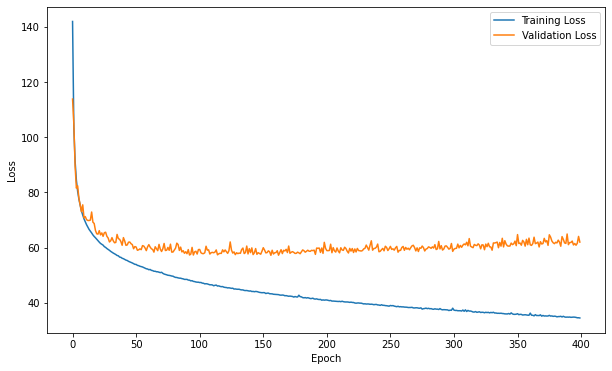

In [15]:
plt.rcParams["figure.figsize"] = (10,6)
mf.training_vs_validation_loss(fit_hist, log=False)

In [10]:
output = model.predict(ipd.clusters_v)

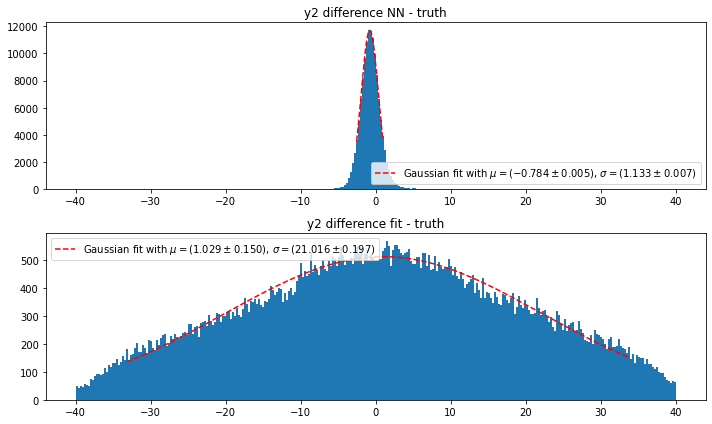

(array([-7.83586969e-01,  1.13338074e+00,  3.32445737e+04]),
 array([5.39836719e-03, 7.12019362e-03, 1.67833913e+02]),
 array([1.02911843e+00, 2.10161338e+01, 2.70003961e+04]),
 array([1.50266746e-01, 1.96979425e-01, 2.04282889e+02]))

In [11]:
mf.histo_output(output.T[4], ipd.veri_fit.T[4], ipd.veri_truth.T[4], name="y2", range_x=(-40,40))

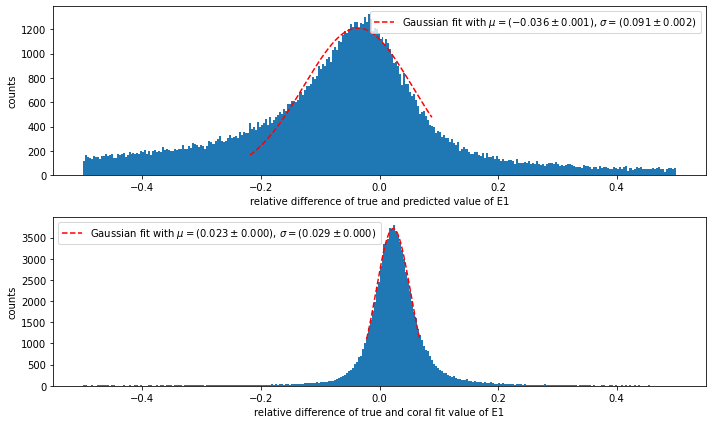

In [12]:
E_bad = mf.histo_output_relE(output.T[2], ipd.veri_fit.T[2], ipd.veri_truth.T[2], name="E1", range_x=(-0.5,0.5), fit=True)

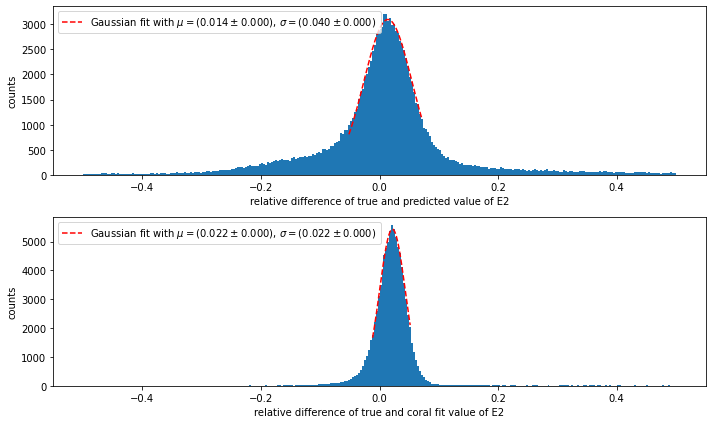

In [13]:
E_bad = mf.histo_output_relE(output.T[5], ipd.veri_fit.T[5], ipd.veri_truth.T[5], name="E2", range_x=(-0.5,0.5), fit=True)

In [14]:
model.save('stage4_network2_big')

INFO:tensorflow:Assets written to: stage4_network2_big/assets
